In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

1. (optional) Implement GMM algorithm by Numpy.
2. Create at least three toy dataset (https://scikit-learn.org/stable/datasets/sample_generators.html), then apply GMM algorithm built in the first question or used sklearn library? Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.
3. Compare kmeans and GMM (cons and pros)
4. Find 3 examples that GMM is better than kmeans

In [ ]:
class custom_GaussianMixture:    
    def __init__(self, n_components = 3, max_iter = 100, tol = 0.001):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.means_ = None
        self.covariances_ = None
        self.log_likelihoods = None
        
    
    def fit(self,X):
        n, d = X.shape  
        k = self.n_components 
        
        mu = X[np.random.choice(n, k, replace = False)]

        # initialize a covariance matrix for each gaussian
        Sigma = [np.eye(d)] * k

        # initialize the probability for each gaussian pi
        pi = np.array([1 / k] * k)

        # initialize responsibility matrix: n points for each gaussian
        W = np.zeros((n,k))

        # initialize list of log-likelihoods
        log_likelihoods = []

        # lambda function for gaussian pdf
        P = lambda m ,s: multivariate_normal.pdf(X, mean = m, cov = s)
        
    
        while len(log_likelihoods) < self.max_iter:
            # E step
            # nominator of responsibilities: j is the j-th gaussian
            for j in range(k):
                W[:, j] = pi[j] * P(mu[j], Sigma[j])

            # log likelihood computation (same as nominator of responsibilities)    
            l = np.sum(np.log(np.sum(W, axis = 1)))

            # store log likelihood in list
            log_likelihoods.append(l)

            # compute W matrix by dividing by denominator (the sum along j) 
            W = (W.T / W.sum(axis = 1)).T

            # sum of w^i entries along j (used for parameter updates)
            # these are the soft weighted number of datapoints belonging to each gaussian
            W_s = np.sum(W, axis = 0)


            # M step
            for j in range(k):
                mu[j] = (1. / W_s[j]) * np.sum(W[:, j] * X.T, axis = 1).T 
                Sigma[j] = ((W[:,j] * ((X - mu[j]).T)) @ (X - mu[j])) / W_s[j]
                pi[j] = W_s[j] / n

            # check for convergence
            # if len(log_likelihoods) < 2: continue
            if np.abs(l - log_likelihoods[-2]) < self.tol: break

        self.means_ = mu
        self.covariances_ = Sigma
        self.log_likelihoods = log_likelihoods
        
    def predict_proba(self, x0):
        probs = np.array([multivariate_normal.pdf(x0, mean = self.means_[j], cov = self.covariances_[j]) for j in range(self.n_components)])
        return probs
    
    def predict(self, x0):
        probs = np.array([multivariate_normal.pdf(x0, mean = self.means_[j], cov = self.covariances_[j]) for j in range(self.n_components)])
        return np.argmax(probs, axis = 0)

In [2]:
# Create three toy datasets
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 3,
                    shuffle=True, 
                    random_state=40)

print("Features:\n", X1[:5])
print("Target:\n", y1[:5])

Features:
 [[-2.94305724 -4.56159935]
 [-1.30337776 -8.9771589 ]
 [-0.13511804 -3.15334516]
 [ 2.88970296 -4.26961959]
 [ 4.18260704 -5.1819068 ]]
Target:
 [2 0 2 1 1]


In [3]:
X2, y2 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 5,
                    shuffle=True, 
                    random_state=40)

print("Features:\n", X2[:5])
print("Target:\n", y2[:5])

Features:
 [[-1.91709047 -6.35880703]
 [-0.33226927  1.41718777]
 [-1.7694279  -9.32767997]
 [ 7.4584847  -5.30050985]
 [ 4.23289146  3.55800723]]
Target:
 [2 3 0 1 4]


In [4]:
X3, y3 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 4,
                    shuffle=True, 
                    random_state=40)

print("Features:\n", X3[:5])
print("Target:\n", y3[:5])

Features:
 [[-1.406291   -3.69019344]
 [ 6.30257159 -5.27091977]
 [ 0.27105523  1.08135882]
 [-1.81453265 -7.62003933]
 [-1.59195501  4.38440315]]
Target:
 [2 1 3 0 3]


(-4.303177597856472,
 9.85154288097889,
 -11.371188444994932,
 -1.5679953095760877)

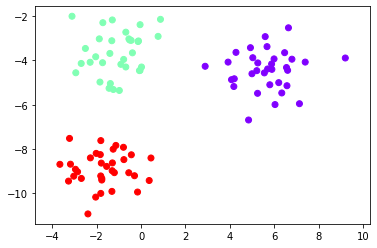

In [5]:
from sklearn.mixture import GaussianMixture

sk_gmm = GaussianMixture(n_components= 3)
sk_gmm.fit(X1)

sk_gmm_labels = sk_gmm.predict(X1)
plt.scatter(X1[:,0], X1[:,1], c= sk_gmm_labels, cmap='rainbow')
plt.axis('equal')

(-4.466854214473122, 8.576315799367146, -10.957695535487401, 6.423024533366622)

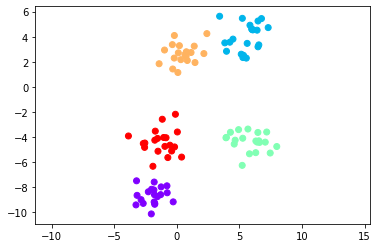

In [6]:
sk_gmm = GaussianMixture(n_components= 5)
sk_gmm.fit(X2)

sk_gmm_labels = sk_gmm.predict(X2)
plt.scatter(X2[:,0], X2[:,1], c= sk_gmm_labels, cmap='rainbow')
plt.axis('equal')

(-3.8332819989055826,
 8.546145693863929,
 -11.691088352538854,
 5.149902748846257)

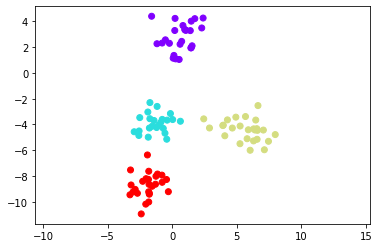

In [7]:
sk_gmm = GaussianMixture(n_components= 4)
sk_gmm.fit(X3)

sk_gmm_labels = sk_gmm.predict(X3)
plt.scatter(X3[:,0], X3[:,1], c= sk_gmm_labels, cmap='rainbow')
plt.axis('equal')

In [8]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

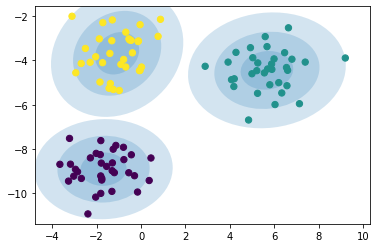

In [9]:
gmm = GaussianMixture(n_components= 3, random_state= 42)
plot_gmm(gmm, X1)

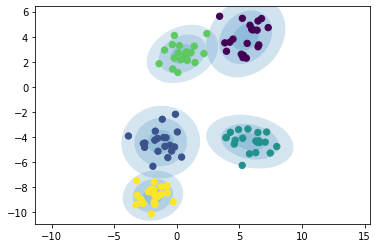

In [10]:
gmm = GaussianMixture(n_components= 5, random_state= 42)
plot_gmm(gmm, X2)

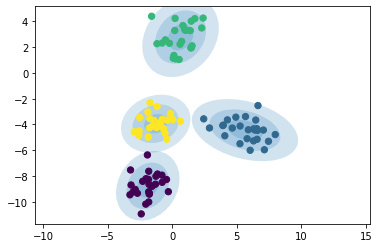

In [11]:
gmm = GaussianMixture(n_components= 4, random_state= 42)
plot_gmm(gmm, X3)

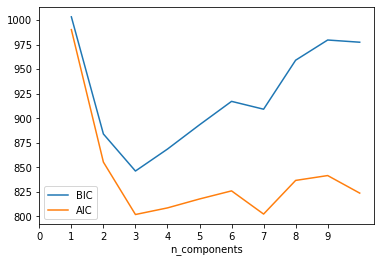

In [12]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X1)
          for n in n_components]

plt.plot(n_components, [m.bic(X1) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X1) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(np.arange(0, 10, step= 1))
plt.show()

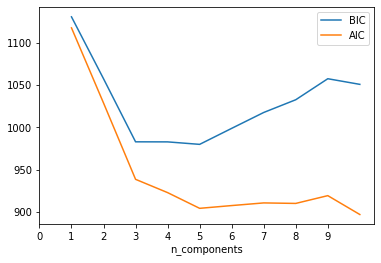

In [13]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X2)
          for n in n_components]

plt.plot(n_components, [m.bic(X2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(np.arange(0, 10, step= 1))
plt.show()

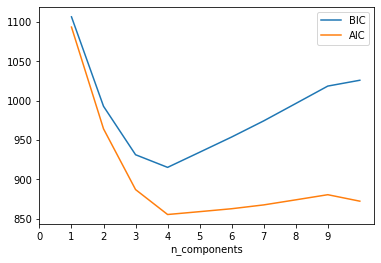

In [14]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X3)
          for n in n_components]

plt.plot(n_components, [m.bic(X3) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X3) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(np.arange(0, 10, step= 1))
plt.show()

In [15]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [16]:
from sklearn import metrics 

In [17]:
n_clusters= np.arange(2, 11)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X1) 
        labels=gmm.predict(X1)
        sil= metrics.silhouette_score(X1, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

Text(0, 0.5, 'Score')

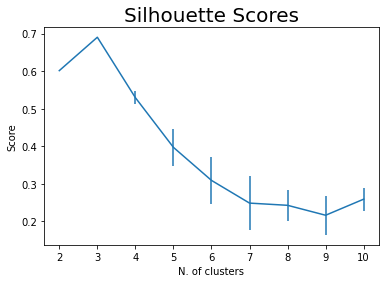

In [20]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [22]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

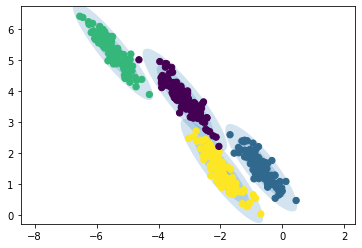

In [26]:
gmm = GaussianMixture(n_components = 4, covariance_type='full', random_state = 42) # allowing for a full covariance the model will fit even very oblong, stretched-out clusters
plot_gmm(gmm, X_stretched)

An important observation for k-means is that these cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters.

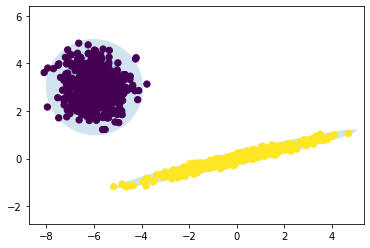

In [29]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0.0, -0.1], [1.7, 0.4]])
X = np.r_[
    np.dot(np.random.randn(n_samples, 2), C),
    0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
]

gmm = GaussianMixture(n_components=2, covariance_type="full")
plot_gmm(gmm, X)

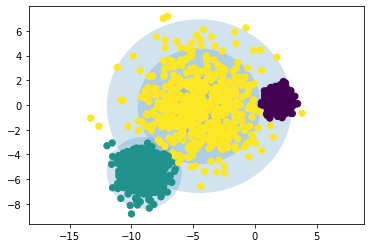

In [38]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Unequal variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
) 

gmm = GaussianMixture(n_components=3, covariance_type="full")
plot_gmm(gmm, X_varied)

# **COMPARE: KMEANS & GMM**

K-Means Clustering:

It is an algorithm, which classifies samples based on attributes/features into K number of clusters. Clustering or grouping of samples is done by minimizing the distance between sample and the centroid. i.e. Assign the centroid and optimize the centroid based on the distances from the points to it. This is called as Hard Assignment i.e. We are certain that particular points belong to particular centroid and then based on the least squares distance method, we will optimize the place of the centroid.

Advantages of K-Means:

1. Running Time

2. Better for high dimensional data.

3. Easy to interpret and Implement.

Disadvantages of K-Means:

1. Assumes the clusters as spherical, so does not work efficiently with complex geometrical shaped data(Mostly Non-Linear)

2. Hard Assignment might lead to mis grouping.

Guassian Mixture:

Instead of Hard assgning data points to a cluster, if we are uncertain about the data points where they belong or to which group, we use this method. It uses probability of a sample to determine the feasibility of it belonging to a cluster.

Advantages:

1. Does not assume clusters to be of any geometry. Works well with non-linear geometric distributions as well.

2. Does not bias the cluster sizes to have specific structures as does by K-Means (Circular).

Disadvantages:

1. Uses all the components it has access to, so initialization of clusters will be difficult when dimensionality of data is high.

2. Difficult to interpret.